In [ ]:
import pandas as pd
weather = pd.read_csv("local_weather.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1960-01-01,KZ000035394,"KARAGANDA, KZ",0.00,NaN,17,22.0,10.0
1960-01-02,KZ000035394,"KARAGANDA, KZ",0.00,NaN,11,14.0,7.0
1960-01-03,KZ000035394,"KARAGANDA, KZ",0.00,NaN,8,12.0,0.0
1960-01-04,KZ000035394,"KARAGANDA, KZ",0.02,NaN,19,25.0,8.0
1960-01-05,KZ000035394,"KARAGANDA, KZ",0.13,NaN,16,24.0,8.0
...,...,...,...,...,...,...,...
2024-02-24,KZ000035394,"KARAGANDA, KZ",NaN,11.4,-16,3.0,NaN
2024-02-25,KZ000035394,"KARAGANDA, KZ",NaN,11.4,-5,9.0,NaN
2024-02-26,KZ000035394,"KARAGANDA, KZ",NaN,NaN,4,17.0,NaN


In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.282904
SNWD       0.846193
TAVG       0.000000
TMAX       0.094315
TMIN       0.227168
dtype: float64

In [ ]:
core_weather = weather[[ "TAVG", "TMAX", "TMIN"]].copy()
core_weather.columns = ["temp_avg", "temp_max", "temp_min"]
core_weather

,temp_avg,temp_max,temp_min
DATE,,,
1960-01-01,17,22.0,10.0
1960-01-02,11,14.0,7.0
1960-01-03,8,12.0,0.0
1960-01-04,19,25.0,8.0
1960-01-05,16,24.0,8.0
...,...,...,...
2024-02-24,-16,3.0,NaN
2024-02-25,-5,9.0,NaN
2024-02-26,4,17.0,NaN


In [ ]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

temp_avg    0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [ ]:
core_weather = core_weather.fillna(method="ffill")

In [ ]:
core_weather

,temp_avg,temp_max,temp_min
DATE,,,
1960-01-01,17,22.0,10.0
1960-01-02,11,14.0,7.0
1960-01-03,8,12.0,0.0
1960-01-04,19,25.0,8.0
1960-01-05,16,24.0,8.0
...,...,...,...
2024-02-24,-16,3.0,-26.0
2024-02-25,-5,9.0,-26.0
2024-02-26,4,17.0,-26.0


In [ ]:
core_weather.dtypes

temp_avg      int64
temp_max    float64
temp_min    float64
dtype: object

In [ ]:
core_weather['temp_avg'] = core_weather['temp_avg'].astype('float64')

In [ ]:
core_weather.dtypes

temp_avg    float64
temp_max    float64
temp_min    float64
dtype: object

In [14]:
core_weather

,temp_avg,temp_max,temp_min
DATE,,,
1960-01-01,17.0,22.0,10.0
1960-01-02,11.0,14.0,7.0
1960-01-03,8.0,12.0,0.0
1960-01-04,19.0,25.0,8.0
1960-01-05,16.0,24.0,8.0
...,...,...,...
2024-02-24,-16.0,3.0,-26.0
2024-02-25,-5.0,9.0,-26.0
2024-02-26,4.0,17.0,-26.0


In [15]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27', '2024-03-03'],
      dtype='object', name='DATE', length=23432)

In [16]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
           dtype='int64', name='DATE', length=23432)

In [17]:
core_weather.apply(lambda x: (x==9999).sum())

temp_avg    0
temp_max    0
temp_min    0
dtype: int64

In [18]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    366
2021    362
2022    365
2023    365
2024     59
Name: DATE, Length: 65, dtype: int64

In [19]:
# Convert temperature columns from Fahrenheit to Celsius
core_weather['temp_avg_C'] = (core_weather['temp_avg'] - 32) * 5/9
core_weather['temp_max_C'] = (core_weather['temp_max'] - 32) * 5/9
core_weather['temp_min_C'] = (core_weather['temp_min'] - 32) * 5/9
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C
DATE,,,,,,
1960-01-01,17.0,22.0,10.0,-8.333333,-5.555556,-12.222222
1960-01-02,11.0,14.0,7.0,-11.666667,-10.000000,-13.888889
1960-01-03,8.0,12.0,0.0,-13.333333,-11.111111,-17.777778
1960-01-04,19.0,25.0,8.0,-7.222222,-3.888889,-13.333333
1960-01-05,16.0,24.0,8.0,-8.888889,-4.444444,-13.333333
...,...,...,...,...,...,...
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222
2024-02-25,-5.0,9.0,-26.0,-20.555556,-12.777778,-32.222222
2024-02-26,4.0,17.0,-26.0,-15.555556,-8.333333,-32.222222


<Axes: xlabel='DATE'>

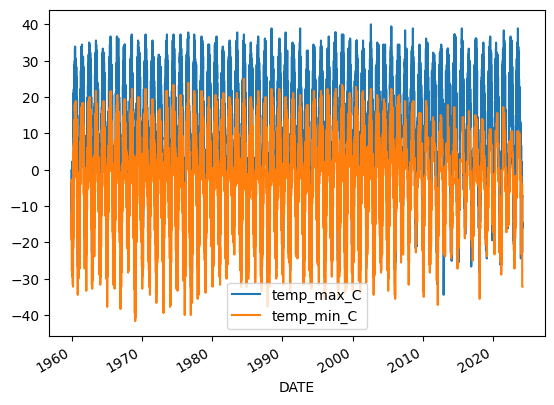

In [21]:
core_weather[["temp_max_C", "temp_min_C"]].plot()

In [22]:
core_weather.dtypes

temp_avg      float64
temp_max      float64
temp_min      float64
temp_avg_C    float64
temp_max_C    float64
temp_min_C    float64
dtype: object

<Axes: xlabel='DATE'>

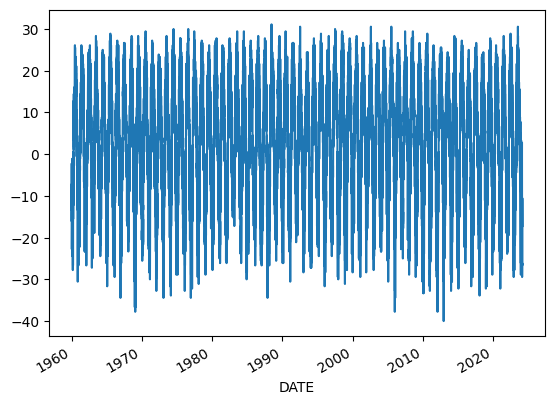

In [23]:
core_weather["temp_avg_C"].plot()

In [24]:
core_weather["target"] = core_weather.shift(-1)["temp_max_C"]
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target
DATE,,,,,,,
1960-01-01,17.0,22.0,10.0,-8.333333,-5.555556,-12.222222,-10.000000
1960-01-02,11.0,14.0,7.0,-11.666667,-10.000000,-13.888889,-11.111111
1960-01-03,8.0,12.0,0.0,-13.333333,-11.111111,-17.777778,-3.888889
1960-01-04,19.0,25.0,8.0,-7.222222,-3.888889,-13.333333,-4.444444
1960-01-05,16.0,24.0,8.0,-8.888889,-4.444444,-13.333333,-11.666667
...,...,...,...,...,...,...,...
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778
2024-02-25,-5.0,9.0,-26.0,-20.555556,-12.777778,-32.222222,-8.333333
2024-02-26,4.0,17.0,-26.0,-15.555556,-8.333333,-32.222222,-7.222222


In [25]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target
DATE,,,,,,,
1960-01-01,17.0,22.0,10.0,-8.333333,-5.555556,-12.222222,-10.000000
1960-01-02,11.0,14.0,7.0,-11.666667,-10.000000,-13.888889,-11.111111
1960-01-03,8.0,12.0,0.0,-13.333333,-11.111111,-17.777778,-3.888889
1960-01-04,19.0,25.0,8.0,-7.222222,-3.888889,-13.333333,-4.444444
1960-01-05,16.0,24.0,8.0,-8.888889,-4.444444,-13.333333,-11.666667
...,...,...,...,...,...,...,...
2024-02-23,-2.0,13.0,-26.0,-18.888889,-10.555556,-32.222222,-16.111111
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778
2024-02-25,-5.0,9.0,-26.0,-20.555556,-12.777778,-32.222222,-8.333333


In [26]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

predictors = ["temp_avg_C", "temp_max_C", "temp_min_C"]
train = core_weather.loc[:"2018-12-31"]
test = core_weather.loc["2019-01-01":]

reg.fit(train[predictors], train["target"])
Ridge(alpha=0.1)
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"], predictions)

2.9033949752740904

In [27]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual", "predictions"]
combined

,actual,predictions
DATE,,
2019-01-01,-11.111111,-15.546274
2019-01-02,-16.111111,-14.693890
2019-01-03,-18.333333,-17.364490
2019-01-04,-13.888889,-19.421252
2019-01-05,-8.888889,-15.508458
...,...,...
2024-02-23,-16.111111,-10.746825
2024-02-24,-12.777778,-17.193472
2024-02-25,-8.333333,-12.803587


<Axes: xlabel='DATE'>

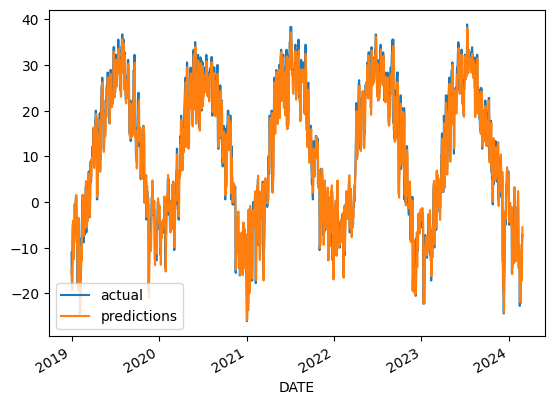

In [28]:
combined.plot()

In [29]:
reg.coef_

array([ 0.36131336,  0.65455774, -0.03122604])

In [30]:
def create_predictions(predictions, core_weather, reg):
  train = core_weather.loc[:"2018-12-31"]
  test = core_weather.loc["2019-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns=["actual", "predictions"]
  return error, combined

In [31]:
core_weather["month_max"] = core_weather["temp_max_C"].rolling(30).mean()
core_weather["month_day_max"] = core_weather["month_max"] / (core_weather["temp_max_C"] + 1e-10)
core_weather["max_min"] = core_weather["temp_max_C"] / (core_weather["temp_min_C"] + 1e-10)
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_max", "month_day_max", "max_min"]

In [34]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,month_min,month_day_min,target_min
DATE,,,,,,,,,,,,,
1960-01-01,17.0,22.0,10.0,-8.333333,-5.555556,-12.222222,-10.000000,NaN,NaN,0.454545,NaN,NaN,-13.888889
1960-01-02,11.0,14.0,7.0,-11.666667,-10.000000,-13.888889,-11.111111,NaN,NaN,0.720000,NaN,NaN,-17.777778
1960-01-03,8.0,12.0,0.0,-13.333333,-11.111111,-17.777778,-3.888889,NaN,NaN,0.625000,NaN,NaN,-13.333333
1960-01-04,19.0,25.0,8.0,-7.222222,-3.888889,-13.333333,-4.444444,NaN,NaN,0.291667,NaN,NaN,-13.333333
1960-01-05,16.0,24.0,8.0,-8.888889,-4.444444,-13.333333,-11.666667,NaN,NaN,0.333333,NaN,NaN,-15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,-2.0,13.0,-26.0,-18.888889,-10.555556,-32.222222,-16.111111,-9.611111,0.910526,0.327586,-16.111111,0.500000,-32.222222
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778,-10.222222,0.634483,0.500000,-16.759259,0.520115,-32.222222
2024-02-25,-5.0,9.0,-26.0,-20.555556,-12.777778,-32.222222,-8.333333,-10.722222,0.839130,0.396552,-17.407407,0.540230,-32.222222


In [33]:
core_weather["month_min"] = core_weather["temp_min_C"].rolling(30).mean()
core_weather["month_day_min"] = core_weather["month_min"] / (core_weather["temp_min_C"] + 1e-10)
core_weather["target_min"] = core_weather.shift(-1)["temp_min_C"]

In [35]:
core_weather = core_weather.iloc[30:,:].copy()
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,month_min,month_day_min,target_min
DATE,,,,,,,,,,,,,
1960-01-31,18.0,27.0,7.0,-7.777778,-2.777778,-13.888889,-2.777778,-8.166667,2.940000,0.200000,-16.314815,1.174667,-6.111111
1960-02-01,24.0,27.0,21.0,-4.444444,-2.777778,-6.111111,2.222222,-7.925926,2.853333,0.454545,-16.055556,2.627273,-5.000000
1960-02-02,30.0,36.0,23.0,-1.111111,2.222222,-5.000000,2.222222,-7.481481,-3.366667,-0.444444,-15.629630,3.125926,-10.555556
1960-02-03,17.0,36.0,13.0,-8.333333,2.222222,-10.555556,-6.666667,-7.277778,-3.275000,-0.210526,-15.537037,1.471930,-14.444444
1960-02-04,14.0,20.0,6.0,-10.000000,-6.666667,-14.444444,-13.888889,-7.351852,1.102778,0.461538,-15.574074,1.078205,-18.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,-7.0,6.0,-26.0,-21.666667,-14.444444,-32.222222,-10.555556,-9.462963,0.655128,0.448276,-15.462963,0.479885,-32.222222
2024-02-23,-2.0,13.0,-26.0,-18.888889,-10.555556,-32.222222,-16.111111,-9.611111,0.910526,0.327586,-16.111111,0.500000,-32.222222
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778,-10.222222,0.634483,0.500000,-16.759259,0.520115,-32.222222


In [36]:
core_weather["monthly_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min",  "month_max", "day_of_year_avg", "monthly_avg"]

<ipython-input-36-01d3bebb10ae>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["monthly_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
<ipython-input-36-01d3bebb10ae>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core

In [37]:
error, combined = create_predictions(predictors, core_weather, reg)
error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12777e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


2.9179244356481617

In [38]:
reg.coef_

array([ 3.24584077e-01,  5.22288085e-01, -8.57751767e-02, -6.04217964e-12,
        3.49885265e-12, -1.64988846e-03,  1.75322956e-01,  7.52603330e-02])

In [39]:
core_weather.corr()["target"]

temp_avg           0.952871
temp_max           0.960437
temp_min           0.901917
temp_avg_C         0.952871
temp_max_C         0.960437
temp_min_C         0.901917
target             1.000000
month_max          0.890504
month_day_max      0.011347
max_min            0.049777
month_min          0.853291
month_day_min      0.010108
target_min         0.928271
monthly_avg        0.909151
day_of_year_avg    0.923456
Name: target, dtype: float64

In [40]:
combined["diff"] = (combined["actual"]) - combined["predictions"].abs()
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2023-04-05,18.888889,6.391526,12.497362
2019-09-21,32.222222,20.615780,11.606442
2021-04-07,18.888889,9.026376,9.862513
2022-10-06,23.333333,13.564491,9.768843
2023-11-07,13.333333,4.051613,9.281721


In [41]:
core_weather["temp_range"] = core_weather["temp_max_C"] - core_weather["temp_min_C"]
core_weather["temp_avg_diff"] = core_weather["temp_avg_C"] - core_weather["temp_min_C"]
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min", "month_max", "day_of_year_avg", "monthly_avg", "temp_range", "temp_avg_diff"]

In [42]:
error, combined = create_predictions(predictors, core_weather, reg)
error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4009e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


2.9179244084108653

In [43]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def create_predictions(core_weather, reg, predictors):
    train = core_weather.loc[:"2018-12-31"]
    test = core_weather.loc["2019-01-01":]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )

    model_pipeline.fit(train[predictors], train["target"])
    predictions = model_pipeline.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "predictions"]
    return error, combined

In [44]:
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min", "month_max", "day_of_year_avg", "monthly_avg", "temp_range", "temp_avg_diff"]
error, combined = create_predictions(core_weather, reg, predictors)
print("Error with additional feature engineering:", error)

Error with additional feature engineering: 2.9404812953968325


In [45]:
combined

,actual,predictions
DATE,,
2019-01-01,-11.111111,-14.124439
2019-01-02,-16.111111,-13.810653
2019-01-03,-18.333333,-15.564880
2019-01-04,-13.888889,-17.242989
2019-01-05,-8.888889,-14.192818
...,...,...
2024-02-22,-10.555556,-14.180058
2024-02-23,-16.111111,-11.960366
2024-02-24,-12.777778,-16.158943


<Axes: xlabel='DATE'>

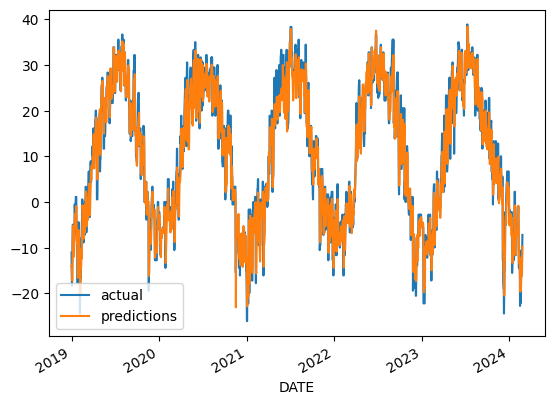

In [46]:
combined.plot()

In [47]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,month_min,month_day_min,target_min,monthly_avg,day_of_year_avg,temp_range,temp_avg_diff
DATE,,,,,,,,,,,,,,,,,
1960-01-31,18.0,27.0,7.0,-7.777778,-2.777778,-13.888889,-2.777778,-8.166667,2.940000,0.200000,-16.314815,1.174667,-6.111111,-2.777778,-2.777778,11.111111,6.111111
1960-02-01,24.0,27.0,21.0,-4.444444,-2.777778,-6.111111,2.222222,-7.925926,2.853333,0.454545,-16.055556,2.627273,-5.000000,-2.777778,-2.777778,3.333333,1.666667
1960-02-02,30.0,36.0,23.0,-1.111111,2.222222,-5.000000,2.222222,-7.481481,-3.366667,-0.444444,-15.629630,3.125926,-10.555556,-0.277778,2.222222,7.222222,3.888889
1960-02-03,17.0,36.0,13.0,-8.333333,2.222222,-10.555556,-6.666667,-7.277778,-3.275000,-0.210526,-15.537037,1.471930,-14.444444,0.555556,2.222222,12.777778,2.222222
1960-02-04,14.0,20.0,6.0,-10.000000,-6.666667,-14.444444,-13.888889,-7.351852,1.102778,0.461538,-15.574074,1.078205,-18.888889,-1.250000,-6.666667,7.777778,4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,-7.0,6.0,-26.0,-21.666667,-14.444444,-32.222222,-10.555556,-9.462963,0.655128,0.448276,-15.462963,0.479885,-32.222222,-8.069695,-7.709402,17.777778,10.555556
2024-02-23,-2.0,13.0,-26.0,-18.888889,-10.555556,-32.222222,-16.111111,-9.611111,0.910526,0.327586,-16.111111,0.500000,-32.222222,-8.071055,-7.820513,21.666667,13.333333
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778,-10.222222,0.634483,0.500000,-16.759259,0.520115,-32.222222,-8.075451,-7.606838,16.111111,5.555556


In [48]:
def create_min_predictions(core_weather, reg, predictors):
    train = core_weather.loc[:"2018-12-31"]
    test = core_weather.loc["2019-01-01":]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )
    model_pipeline.fit(train[predictors], train["target_min"])
    predictions = model_pipeline.predict(test[predictors])
    error = mean_absolute_error(test["target_min"], predictions)
    combined = pd.concat([test["target_min"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual_min", "predictions_min"]
    return error, combined


predictors_min = [
    "temp_avg_C", "temp_max_C", "temp_min_C",
    "month_day_min", "max_min", "month_min",
    "day_of_year_avg", "monthly_avg",
    "temp_range", "temp_avg_diff"
]

reg_min = Ridge(alpha=0.1)

error_min, combined_min = create_min_predictions(core_weather, reg_min, predictors_min)
print("Error for temp_min_C prediction:", error_min)

Error for temp_min_C prediction: 2.0531180630127825


<Axes: xlabel='DATE'>

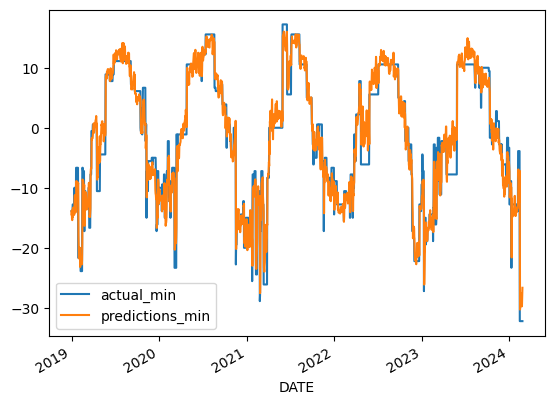

In [49]:
combined_min.plot()

In [59]:
combined_min

,actual_min,predictions_min
DATE,,
2019-01-01,-13.888889,-14.439235
2019-01-02,-13.888889,-13.774768
2019-01-03,-13.888889,-15.133640
2019-01-04,-13.888889,-15.395127
2019-01-05,-13.888889,-14.859837
...,...,...
2024-02-22,-32.222222,-28.207923
2024-02-23,-32.222222,-27.646531
2024-02-24,-32.222222,-29.752748


In [58]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,month_min,month_day_min,target_min,monthly_avg,day_of_year_avg,temp_range,temp_avg_diff
DATE,,,,,,,,,,,,,,,,,
1960-01-31,18.0,27.0,7.0,-7.777778,-2.777778,-13.888889,-2.777778,-8.166667,2.940000,0.200000,-16.314815,1.174667,-6.111111,-2.777778,-2.777778,11.111111,6.111111
1960-02-01,24.0,27.0,21.0,-4.444444,-2.777778,-6.111111,2.222222,-7.925926,2.853333,0.454545,-16.055556,2.627273,-5.000000,-2.777778,-2.777778,3.333333,1.666667
1960-02-02,30.0,36.0,23.0,-1.111111,2.222222,-5.000000,2.222222,-7.481481,-3.366667,-0.444444,-15.629630,3.125926,-10.555556,-0.277778,2.222222,7.222222,3.888889
1960-02-03,17.0,36.0,13.0,-8.333333,2.222222,-10.555556,-6.666667,-7.277778,-3.275000,-0.210526,-15.537037,1.471930,-14.444444,0.555556,2.222222,12.777778,2.222222
1960-02-04,14.0,20.0,6.0,-10.000000,-6.666667,-14.444444,-13.888889,-7.351852,1.102778,0.461538,-15.574074,1.078205,-18.888889,-1.250000,-6.666667,7.777778,4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,-7.0,6.0,-26.0,-21.666667,-14.444444,-32.222222,-10.555556,-9.462963,0.655128,0.448276,-15.462963,0.479885,-32.222222,-8.069695,-7.709402,17.777778,10.555556
2024-02-23,-2.0,13.0,-26.0,-18.888889,-10.555556,-32.222222,-16.111111,-9.611111,0.910526,0.327586,-16.111111,0.500000,-32.222222,-8.071055,-7.820513,21.666667,13.333333
2024-02-24,-16.0,3.0,-26.0,-26.666667,-16.111111,-32.222222,-12.777778,-10.222222,0.634483,0.500000,-16.759259,0.520115,-32.222222,-8.075451,-7.606838,16.111111,5.555556


In [51]:
def create_prediction_27(core_weather, reg, predictors):
    train = core_weather.loc[:"2024-02-26"]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )

    model_pipeline.fit(train[predictors], train["target"])
    prediction_2024_02_28 = model_pipeline.predict(train.iloc[[-1]][predictors])
    return prediction_2024_02_28

reg = Ridge(alpha=0.1)
prediction_2024_02_27 = create_prediction_27(core_weather, reg, predictors)
print("Predicted temp_max_C for 2024-02-27:", prediction_2024_02_27)

Predicted temp_max_C for 2024-02-27: [-9.66971337]


In [52]:
def create_min_prediction_27(core_weather, reg, predictors):
    train = core_weather.loc[:"2024-02-26"]
    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )
    model_pipeline.fit(train[predictors], train["target_min"])
    prediction_2024_02_27 = model_pipeline.predict(train.iloc[[-1]][predictors])
    return prediction_2024_02_27

reg_min = Ridge(alpha=0.1)
prediction_2024_02_27_min = create_min_prediction_27(core_weather, reg_min, predictors_min)
print("Predicted temp_min_C for 2024-02-27:", prediction_2024_02_27_min)

Predicted temp_min_C for 2024-02-27: [-28.07780137]


In [54]:
import joblib

# Save the reg_min model
joblib.dump(reg_min, 'reg_min_model_3.joblib')

# Save the reg model
joblib.dump(reg, 'reg_model_3.joblib')

['reg_model_3.joblib']

In [55]:
combined_min.to_csv('combined_min.csv')
combined.to_csv('combined.csv')